In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import sys
path = os.path.join(os.getcwd(), os.pardir)
sys.path.append(path)

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from BAI import environment, solver, analysis

In [3]:
reward_func = environment.func_gaussian_reward([0.1, 0.0], [1, 1])

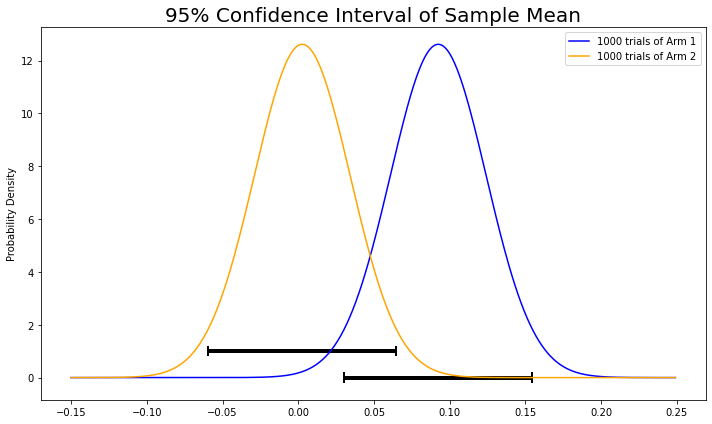

In [56]:
sample_arm_1, mu_1, _ = reward_func(chosen_arm=0, batch_trials=1000)
sample_arm_2, mu_2, _ = reward_func(chosen_arm=1, batch_trials=1000)

plt.rcParams['figure.figsize'] = [10, 6]

x_axis = np.arange(-0.15, 0.25, 0.001)
pdf_mu_1 = norm.pdf(x_axis, sample_arm_1.mean(), 1 / np.sqrt(len(sample_arm_1)))
pdf_mu_2 = norm.pdf(x_axis, sample_arm_2.mean(), 1 / np.sqrt(len(sample_arm_2)))

fig, ax = plt.subplots()
ax.plot(x_axis, pdf_mu_1, label='1000 trials of Arm 1', color='blue')
# ax.vlines(mu_1, 0, max(pdf_mu_1), color='blue', linestyles='dotted')
ax.hlines(0, sample_arm_1.mean() - 1.96 * 1 / np.sqrt(len(sample_arm_1)), sample_arm_1.mean() + 1.96 * 1 / np.sqrt(len(sample_arm_1)), color='black', lw=4)
ax.vlines(sample_arm_1.mean() - 1.96 * 1 / np.sqrt(len(sample_arm_1)), 0-0.2, 0+0.2, color='black', lw=2)
ax.vlines(sample_arm_1.mean() + 1.96 * 1 / np.sqrt(len(sample_arm_1)), 0-0.2, 0+0.2, color='black', lw=2)
ax.plot(x_axis, pdf_mu_2, label='1000 trials of Arm 2', color='orange')
# ax.vlines(mu_2, 0, max(pdf_mu_2), color='orange', linestyles='dotted')
ax.hlines(1, sample_arm_2.mean() - 1.96 * 1 / np.sqrt(len(sample_arm_2)), sample_arm_2.mean() + 1.96 * 1 / np.sqrt(len(sample_arm_2)), color='black', lw=4)
ax.vlines(sample_arm_2.mean() - 1.96 * 1 / np.sqrt(len(sample_arm_2)), 1-0.2, 1+0.2, color='black', lw=2)
ax.vlines(sample_arm_2.mean() + 1.96 * 1 / np.sqrt(len(sample_arm_2)), 1-0.2, 1+0.2, color='black', lw=2)


ax.set_title('95% Confidence Interval of Sample Mean', fontsize=20)
ax.set_ylabel('Probability Density', fontsize=10)
ax.legend(fontsize=10)

fig.tight_layout()

plt.show()

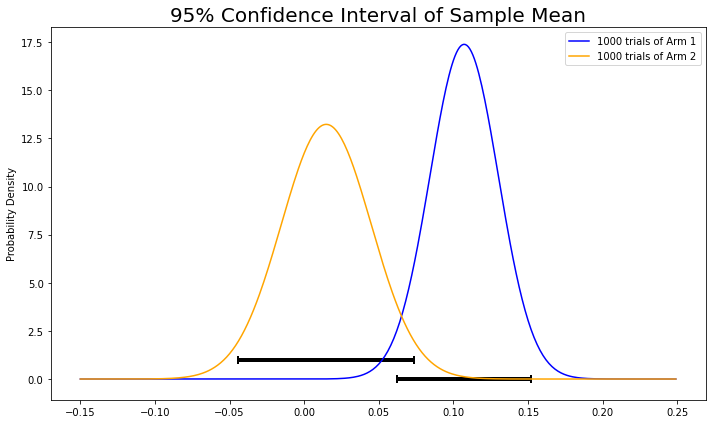

In [62]:
extra_sample_arm_1, mu_1, _ = reward_func(chosen_arm=0, batch_trials=900)
extra_sample_arm_2, mu_2, _ = reward_func(chosen_arm=1, batch_trials=100)

extended_sample_arm_1 = np.concatenate((sample_arm_1, extra_sample_arm_1), axis=0)
extended_sample_arm_2 = np.concatenate((sample_arm_2, extra_sample_arm_2), axis=0)

plt.rcParams['figure.figsize'] = [10, 6]

x_axis = np.arange(-0.15, 0.25, 0.001)
pdf_mu_1 = norm.pdf(x_axis, extended_sample_arm_1.mean(), 1 / np.sqrt(len(extended_sample_arm_1)))
pdf_mu_2 = norm.pdf(x_axis, extended_sample_arm_2.mean(), 1 / np.sqrt(len(extended_sample_arm_2)))

fig, ax = plt.subplots()
ax.plot(x_axis, pdf_mu_1, label='1000 trials of Arm 1', color='blue')
# ax.vlines(mu_1, 0, max(pdf_mu_1), color='blue', linestyles='dotted')
ax.hlines(0, extended_sample_arm_1.mean() - 1.96 * 1 / np.sqrt(len(extended_sample_arm_1)), extended_sample_arm_1.mean() + 1.96 * 1 / np.sqrt(len(extended_sample_arm_1)), color='black', lw=4)
ax.vlines(extended_sample_arm_1.mean() - 1.96 * 1 / np.sqrt(len(extended_sample_arm_1)), 0-0.2, 0+0.2, color='black', lw=2)
ax.vlines(extended_sample_arm_1.mean() + 1.96 * 1 / np.sqrt(len(extended_sample_arm_1)), 0-0.2, 0+0.2, color='black', lw=2)
ax.plot(x_axis, pdf_mu_2, label='1000 trials of Arm 2', color='orange')
# ax.vlines(mu_2, 0, max(pdf_mu_2), color='orange', linestyles='dotted')
ax.hlines(1, extended_sample_arm_2.mean() - 1.96 * 1 / np.sqrt(len(extended_sample_arm_2)), extended_sample_arm_2.mean() + 1.96 * 1 / np.sqrt(len(extended_sample_arm_2)), color='black', lw=4)
ax.vlines(extended_sample_arm_2.mean() - 1.96 * 1 / np.sqrt(len(extended_sample_arm_2)), 1-0.2, 1+0.2, color='black', lw=2)
ax.vlines(extended_sample_arm_2.mean() + 1.96 * 1 / np.sqrt(len(extended_sample_arm_2)), 1-0.2, 1+0.2, color='black', lw=2)


ax.set_title('95% Confidence Interval of Sample Mean', fontsize=20)
ax.set_ylabel('Probability Density', fontsize=10)
ax.legend(fontsize=10)

fig.tight_layout()

plt.show()

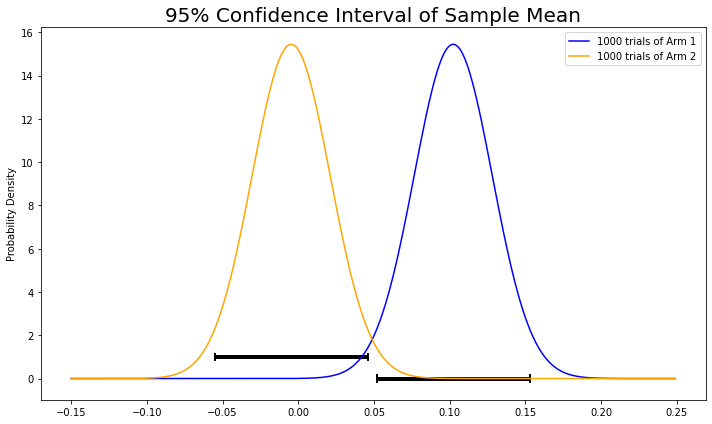

In [65]:
extra_sample_arm_1, mu_1, _ = reward_func(chosen_arm=0, batch_trials=500)
extra_sample_arm_2, mu_2, _ = reward_func(chosen_arm=1, batch_trials=500)

extended_sample_arm_1 = np.concatenate((sample_arm_1, extra_sample_arm_1), axis=0)
extended_sample_arm_2 = np.concatenate((sample_arm_2, extra_sample_arm_2), axis=0)

plt.rcParams['figure.figsize'] = [10, 6]

x_axis = np.arange(-0.15, 0.25, 0.001)
pdf_mu_1 = norm.pdf(x_axis, extended_sample_arm_1.mean(), 1 / np.sqrt(len(extended_sample_arm_1)))
pdf_mu_2 = norm.pdf(x_axis, extended_sample_arm_2.mean(), 1 / np.sqrt(len(extended_sample_arm_2)))

fig, ax = plt.subplots()
ax.plot(x_axis, pdf_mu_1, label='1000 trials of Arm 1', color='blue')
# ax.vlines(mu_1, 0, max(pdf_mu_1), color='blue', linestyles='dotted')
ax.hlines(0, extended_sample_arm_1.mean() - 1.96 * 1 / np.sqrt(len(extended_sample_arm_1)), extended_sample_arm_1.mean() + 1.96 * 1 / np.sqrt(len(extended_sample_arm_1)), color='black', lw=4)
ax.vlines(extended_sample_arm_1.mean() - 1.96 * 1 / np.sqrt(len(extended_sample_arm_1)), 0-0.2, 0+0.2, color='black', lw=2)
ax.vlines(extended_sample_arm_1.mean() + 1.96 * 1 / np.sqrt(len(extended_sample_arm_1)), 0-0.2, 0+0.2, color='black', lw=2)
ax.plot(x_axis, pdf_mu_2, label='1000 trials of Arm 2', color='orange')
# ax.vlines(mu_2, 0, max(pdf_mu_2), color='orange', linestyles='dotted')
ax.hlines(1, extended_sample_arm_2.mean() - 1.96 * 1 / np.sqrt(len(extended_sample_arm_2)), extended_sample_arm_2.mean() + 1.96 * 1 / np.sqrt(len(extended_sample_arm_2)), color='black', lw=4)
ax.vlines(extended_sample_arm_2.mean() - 1.96 * 1 / np.sqrt(len(extended_sample_arm_2)), 1-0.2, 1+0.2, color='black', lw=2)
ax.vlines(extended_sample_arm_2.mean() + 1.96 * 1 / np.sqrt(len(extended_sample_arm_2)), 1-0.2, 1+0.2, color='black', lw=2)


ax.set_title('95% Confidence Interval of Sample Mean', fontsize=20)
ax.set_ylabel('Probability Density', fontsize=10)
ax.legend(fontsize=10)

fig.tight_layout()

plt.show()